In [2]:
import os
 
os.chdir("/content/drive/MyDrive/Projects/dino=ai")

In [3]:
os.getcwd()

'/content/drive/MyDrive/Projects/dino=ai'

In [4]:
!pip install ktrain

In [5]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import ktrain
from ktrain import vision as vis

In [12]:
DATADIR = 'dataset'
(train_data, val_data, preproc) = vis.images_from_folder(datadir=DATADIR,
                                              # use a default data augmentation with horizontal_flip=True
                                              data_aug=vis.get_data_aug(horizontal_flip=False),
                                              
                                              train_test_names=['train', 'valid'],
                                               target_size=(512, 512), color_mode='rgb')

color_mode detected (grayscale) different than color_mode selected (rgb)
Found 620 images belonging to 2 classes.
Found 620 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


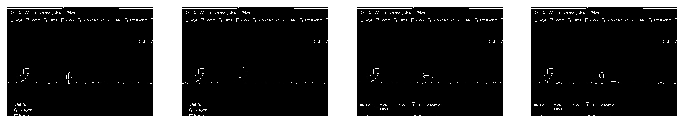

In [13]:
vis.show_random_images('dataset/valid/up/')

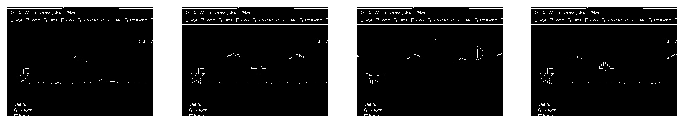

In [14]:
vis.show_random_images('dataset/valid/down/')

In [17]:
model = vis.image_classifier('pretrained_mobilenet', train_data, val_data, freeze_layers=15)
 
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data,
                             workers=8, use_multiprocessing=False, batch_size=26)

The normalization scheme has been changed for use with a pretrained_mobilenet model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
17227776/17225924 [==============================] - 0s 0us/step
pretrained_mobilenet model created.


In [ ]:
learner.autofit(1e-4)
 
loss, acc = learner.model.evaluate_generator(learner.val_data,
                                             steps=len(learner.val_data))
 
print('final loss:%s, final accuracy:%s' % (loss, acc))
 
predictor = ktrain.get_predictor(learner.model, preproc)
 
predictor.save('model/model')

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/1024
24/24 [==============================] - 54s 2s/step - loss: 1.9464 - accuracy: 0.5566 - val_loss: 1.7106 - val_accuracy: 0.5323
Epoch 2/1024
24/24 [==============================] - 53s 2s/step - loss: 1.1917 - accuracy: 0.7197 - val_loss: 0.8062 - val_accuracy: 0.7613
Epoch 3/1024
24/24 [==============================] - 53s 1s/step - loss: 0.7845 - accuracy: 0.8282 - val_loss: 1.7038 - val_accuracy: 0.6516
Epoch 4/1024
24/24 [==============================] - 54s 1s/step - loss: 0.5288 - accuracy: 0.8419 - val_loss: 0.7884 - val_accuracy: 0.7871
Epoch 5/1024
24/24 [==============================] - 54s 2s/step - loss: 0.2323 - accuracy: 0.9242 - val_loss: 0.8324 - val_accuracy: 0.7903
Epoch 6/1024
24/24 [==============================] - 54s 1s/step - loss: 0.3642 - accuracy: 0.9082 - val

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


final loss:0.03855150192975998, final accuracy:0.9935483932495117


In [ ]:
learner.autofit(0.001, 10, reduce_on_plateau=2, reduce_factor=10)

In [ ]:
learner.view_top_losses(n=3, preproc=preproc)

In [ ]:
predictor = ktrain.load_predictor('model/model')
# '/content/drive/MyDrive/Projects/dino=ai/dataset/valid/down/1612115332.1543386_down  - Copy (2).jpg'
predictor.predict_filename('dataset/valid/down/1612115332.1543386_down  - Copy (2).jpg')

In [ ]:
down = 'dataset/valid/down/'
down_dir = os.listdir(down)

In [ ]:
for i in down_dir:
    print(predictor.predict_filename('dataset/valid/down/'+i))